<a href="https://colab.research.google.com/github/noslenPantaleon/yolov3-yolov4-train-mask-detector-project/blob/main/yolov3_and_yolov4_facemask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# %cd /content/drive/MyDrive/Colab Notebooks /opencv/proyect4

TRAINING WITH YOLO **V3**

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Total 15490 (delta 0), reused 0 (delta 0), pack-reused 15490
Receiving objects: 100% (15490/15490), 14.09 MiB | 6.63 MiB/s, done.
Resolving deltas: 100% (10409/10409), done.
Checking out files: 100% (2057/2057), done.


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks /opencv/proyect4/darknet

/content/drive/MyDrive/Colab Notebooks /opencv/proyect4/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt

Building. . . It might take 2-3 minutes


In [ ]:
!wget "https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1" -O mask_no-mask_dataset.zip
!unzip -o mask_no-mask_dataset.zip &> /dev/null

In [ ]:
import random
import os
import subprocess
import sys

image_dir = "../mask_no-mask_dataset"
f_val = open("data_test.txt", 'w')
f_train = open("data_train.txt", 'w')
print (image_dir)



path, dirs, files = next(os.walk(image_dir))
data_size = len(files)

ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg"):
        ind += 1
        
        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
        else:
            f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()

../mask_no-mask_dataset


In [ ]:
# Original File : https://pjreddie.com/media/files/darknet53.conv.74
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74

In [ ]:
!chmod +x ./darknet

In [ ]:
ls

3rdparty/                    darknet_images.py      obj.data
backup/                      darknet.py             predictions.jpg
bad.list                     darknet_video.py       README.md
build/                       data/                  results/
build_log.txt                data_test.txt          scripts/
build.ps1                    data_train.txt         src/
cfg/                         image_yolov3.sh        train_log.txt
chart.png                    image_yolov4.sh        vcpkg.json
chart_yolov3-mask-train.png  include/               video_yolov3.sh
class.names                  json_mjpeg_streams.sh  video_yolov4.sh
cmake/                       LICENSE                yolo-obj.cfg
CMakeLists.txt               Makefile               yolov3-mask-setup.data
darknet*                     net_cam_v3.sh          yolov3-mask-test.cfg
darknet53.conv.74            net_cam_v4.sh          yolov3-mask-train.cfg
DarknetConfig.cmake.in       obj/                   yolov4.conv.137


In [ ]:
!./darknet detector train yolov3-mask-setup.data yolov3-mask-train.cfg darknet53.conv.74 -dont_show -map 2> train_log.txt

In [ ]:
!./darknet detector train yolov3-mask-setup.data yolov3-mask-train.cfg darknet53.conv.74 -dont_show -map 2> train_log.txt

In [ ]:
!./ imshow ('chart.png')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `./ imshow ('chart.png')'


In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 89 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../test_images/test-image1.jpg: Predicted in 45.458000 milli-seconds.
Mask: 100%


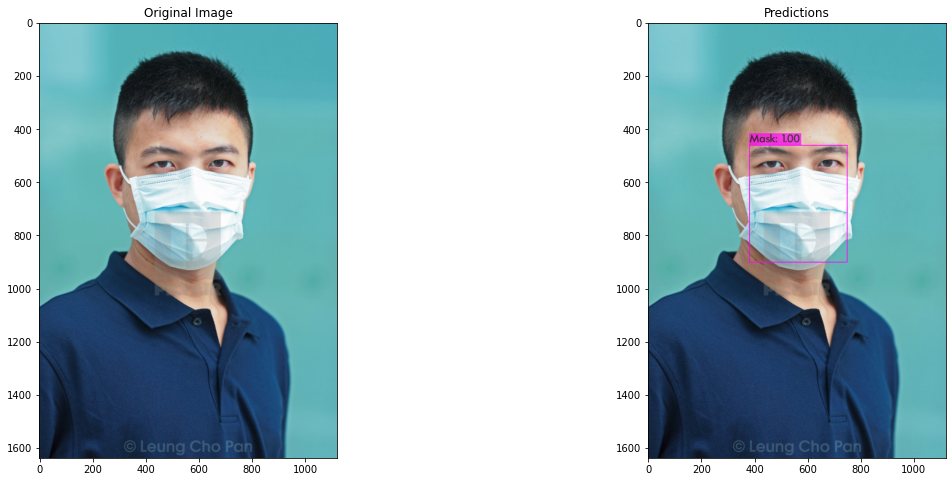

In [ ]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_last.weights ../test_images/test-image1.jpg -thresh .6 2> /dev/null
display_output("../test_images/test-image1.jpg")

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 89 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../test_images/test-image2.jpg: Predicted in 45.371000 milli-seconds.
Mask: 89%
Mask: 83%
NoMask: 98%
Mask: 62%


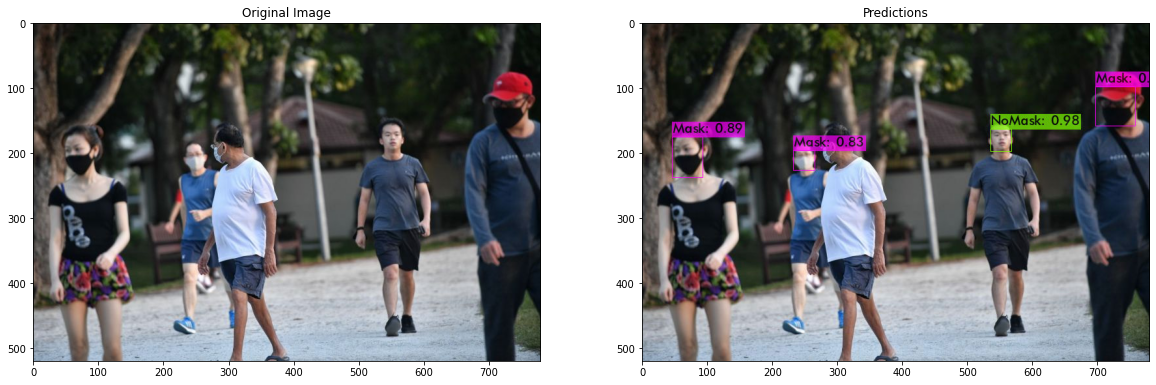

In [ ]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_last.weights ../test_images/test-image2.jpg -thresh .6 2> /dev/null
display_output("../test_images/test-image2.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 89 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../test_images/test-image3.jpg: Predicted in 45.366000 milli-seconds.
Mask: 100%
Mask: 99%
NoMask: 84%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 98%
Mask: 93%
Mask: 100%
Mask: 99%
Mask: 99%
Mask: 100%
Mask: 79%
Mask: 100%
Mask: 100%
Mask: 99%
Mask: 100%


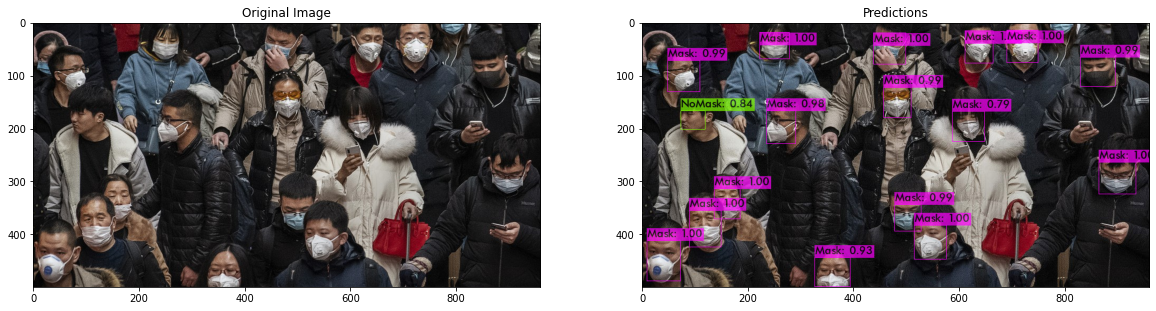

In [ ]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_last.weights ../test_images/test-image3.jpg -thresh .6 2> /dev/null
display_output("../test_images/test-image3.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 89 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../test_images/test-image4.jpg: Predicted in 45.409000 milli-seconds.
NoMask: 87%
Mask: 99%
Mask: 100%
Mask: 100%
Mask: 100%


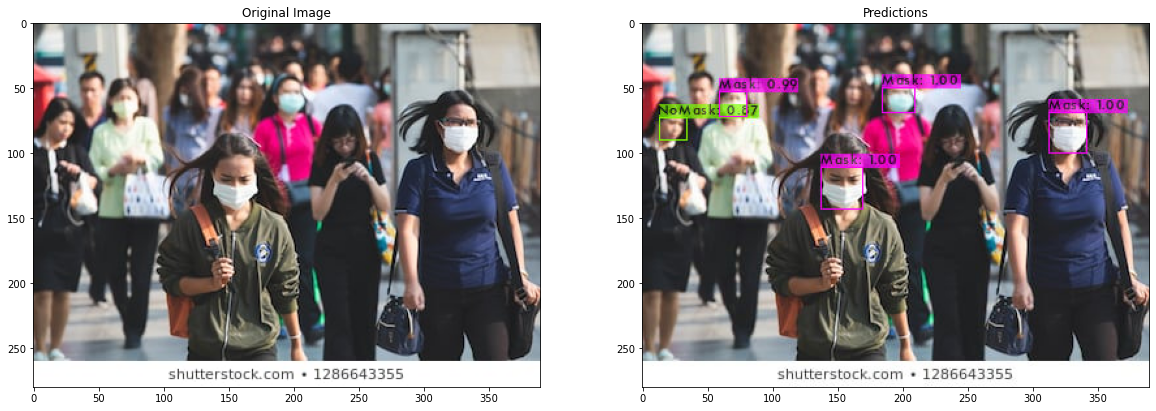

In [ ]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_last.weights ../test_images/test-image4.jpg -thresh .6 2> /dev/null
display_output("../test_images/test-image4.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 76 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
../test_images/test-image4.jpg: Predicted in 45.463000 milli-seconds.
NoMask: 99%
NoMask: 83%
Mask: 100%
Mask: 100%
NoMask: 98%
Mask: 100%
Mask: 100%


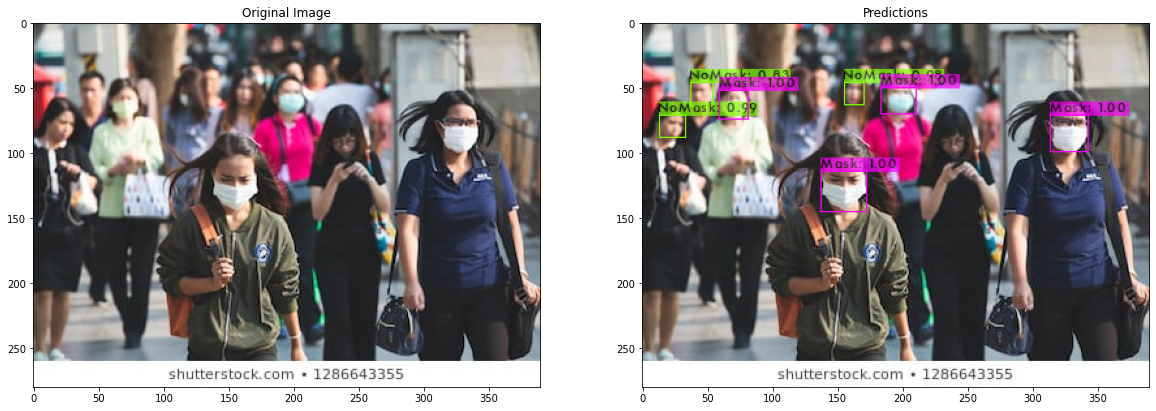

In [ ]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights ../test_images/test-image4.jpg -thresh .6 2> /dev/null
display_output("../test_images/test-image4.jpg")

In [ ]:
!./darknet detector demo yolov3-mask-setup.data yolov3-mask-test.cfg  backup/yolov3-mask-train_last.weights ../test_images/test-video1.mp4 -thresh .6 -out_filename out-vid1.avi -dont_show

Streaming output truncated to the last 5000 lines.
Mask: 97% 
Mask: 78% 

FPS:32.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 83% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 97% 
Mask: 78% 

FPS:33.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 83% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 98% 
Mask: 77% 

FPS:32.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 83% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 97% 
Mask: 78% 

FPS:32.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 83% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 97% 
Mask: 77% 

FPS:31.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 83% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 96% 
Mask: 82% 

FPS:31.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 82% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 94% 
Mask: 84% 

FPS:32.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 81% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 94% 
Mask: 85% 

FPS:32.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 83% 
Mask: 100% 
Mask:

In [ ]:
!./darknet detector demo yolov3-mask-setup.data yolov3-mask-test.cfg  backup/yolov3-mask-train_last.weights ../test_images/test-video2.mp4 -thresh .6 -out_filename out-vid2.avi -dont_show

Streaming output truncated to the last 5000 lines.


FPS:36.9 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:

NoMask: 65% 

FPS:36.9 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:36.9 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:36.9 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:37.0 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:37.1 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:37.2 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:36.6 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:

NoMask: 92% 

FPS:35.5 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:35.1 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:34.4 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:

NoMask: 83% 
Mask: 68% 

FPS:34.1 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:

NoMask: 78% 

FPS:33.6 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:

NoMask: 64% 

FPS:33.5 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:

Mask: 62% 

FPS:32.9 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:32.6 	 AVG_FPS:33.8

 cvWriteFrame 
Objects:


FPS:32.1 	 AVG_FPS:33.8

 cvWriteFrame 
Obje

**TRAINING WITH YOLO V4**

In [ ]:
!./darknet detector train obj.data yolo-obj.cfg yolov4.conv.137  -dont_show -map> trainyolov4_log.txt

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.795217), count: 1, class_loss = 0.032541, iou_loss = 0.033734, total_loss = 0.066275 
 total_bbox = 1205156, rewritten_bbox = 0.109115 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.716656), count: 27, class_loss = 3.461732, iou_loss = 43.896099, total_loss = 47.357830 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.649840), count: 6, class_loss = 1.002356, iou_loss = 2.109250, total_loss = 3.111605 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.555850), count: 2, class_loss = 0.763260, iou_loss = 0.033968, total_loss = 0.797227 
 total_bbox = 1205191, rewritten_bbox = 0.109111 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.747418), count: 47, class_loss = 7.167606, iou_loss = 74.623962, total_loss = 81.79

In [ ]:
!./darknet detector test obj.data yolo-obj.cfg ./backup/yolo-obj_last.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x

In [ ]:
!./darknet detector test obj.data yolo-obj.cfg ./backup/yolo-obj_last.weights -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x